In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [3]:
from machinegnostics.models.regression import PolynomialRegressor
from machinegnostics.models.regression import LinearRegressor
from machinegnostics.metrics import robr2

2025-09-26 10:35:09,508 | LinearRegressor | INFO | LinearRegressor initialized:
2025-09-26 10:35:09,508 | LinearRegressor | INFO | DataProcessLayerBase initialized.
2025-09-26 10:35:09,509 | LinearRegressor | INFO | DataProcessRobustRegressor initialized.
2025-09-26 10:35:09,509 | LinearRegressor | INFO | LinearRegressor initialized.
2025-09-26 10:35:09,509 | LinearRegressor | INFO | Starting fit process for LinearRegressor.
2025-09-26 10:35:09,510 | LinearRegressor | INFO | Starting fit process for DataProcessRobustRegressor.
2025-09-26 10:35:09,510 | LinearRegressor | INFO | Starting fit input/output processing.
2025-09-26 10:35:09,510 | LinearRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2025-09-26 10:35:09,510 | LinearRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2025-09-26 10:35:09,510 | LinearRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2025-09-26 10:35:09,511 | LinearRegressor | INFO | Identify

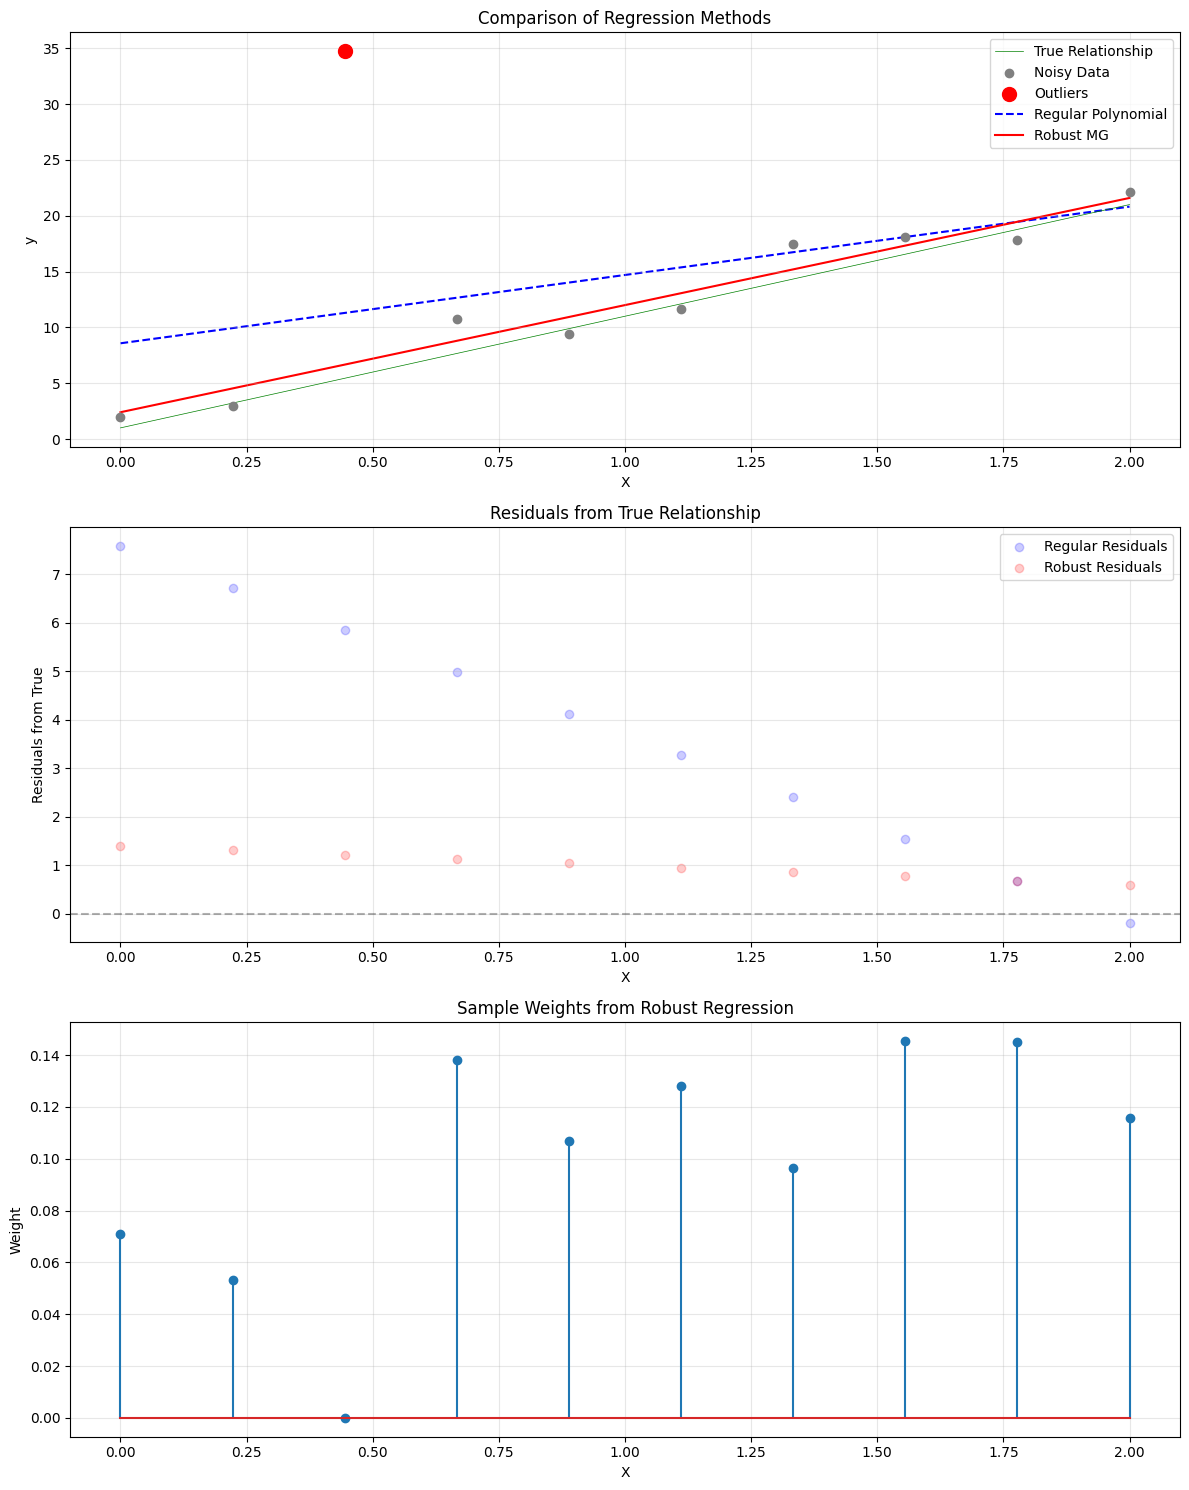

Coefficients:
True:     [1, 2]
Regular:  [0.         6.11971484]
Robust MG: [2.40285216 9.59521403]

MSE against true relationship (excluding outliers):
Regular Polynomial: 24.6826
Robust MG:         1.2263


In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
# y_noisy[2] += [8.0]  # Add outliers
y_noisy[2] = y_noisy[2] + 28.0 

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = LinearRegressor(verbose=True)
# mg_model = RobustRegressor(degree=1)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

In [5]:
# checking cross-validation
from machinegnostics.models import CrossValidator

In [6]:
help(CrossValidator)

Help on class CrossValidator in module machinegnostics.models.cross_validation:

class CrossValidator(builtins.object)
 |  CrossValidator(model, X: numpy.ndarray, y: numpy.ndarray, k=5, shuffle=True, random_seed=None, verbose: bool = False)
 |  
 |  A custom implementation of k-Fold Cross-Validation for evaluating machine learning models.
 |  
 |  Parameters
 |  ----------
 |  model : object
 |      A machine learning model that implements `fit(X, y)` and `predict(X)` methods.
 |      
 |  X : array-like of shape (n_samples, n_features)
 |      Feature matrix.
 |  
 |  y : array-like of shape (n_samples,)
 |      Target labels.
 |  
 |  k : int, default=5
 |      Number of folds to use in cross-validation.
 |  
 |  shuffle : bool, default=True
 |      Whether to shuffle the dataset before splitting into folds.
 |  
 |  random_seed : int or None, default=None
 |      Seed used to shuffle the data. Ignored if `shuffle=False`.
 |  
 |  verbose : bool, default=False
 |      If True, enable

In [7]:
# data split
from machinegnostics.models import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y_noisy)

In [9]:
cv = CrossValidator(model=PolynomialRegressor(degree=2), X=X, y=y_noisy, k=5)
cv_scores = cv.evaluate(robr2)
print("\nCross-validation scores:")
print(cv_scores)


Cross-validation scores:
[np.float64(-3.5516722898790265), np.float64(0.9981574975107319), np.float64(-6.712132075909996), np.float64(0.00557130907975667), np.float64(0.5138908773709999)]


In [10]:
# rob r2
rob_r2 = robr2(y_clean[:-2], y_pred_robust[:-2], w=mg_model.weights[:-2])
print(f"Robust R^2: {rob_r2:.4f}")

Robust R^2: 0.9984


X: [0.  0.4 0.8 1.2 1.6 2. ]
y: [ 17.89408548  69.61586934  -7.19890572   9.37670866 -10.55673099
  16.57855348]

Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 375.9472
Ridge Regression:   393.6559
Lasso Regression:   374.0560
Robust MG:          257.4340
X: [0.  0.4 0.8 1.2 1.6 2. ]
y: [-1.6197332  83.22182026 -5.85196482 15.66974292 35.77224362 72.90933918]

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 516.3775
Ridge Regression:   505.5366
Lasso Regression:   508.2516
Robust MG:          5.5653
X: [0.  0.4 0.8 1.2 1.6 2. ]
y: [ -1.03888779  79.10212022 -15.75954288  -0.93229053  -3.7500141
   2.70397258]

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 518.3422
Ridge Regression:   489.9117
Lasso Regression:   513.7563
Robust MG:          37.0000
X: [0.  0.4 0.8 1.2 1.6 2. ]
y: [  -3.39039047   77.28939421  -33.62627914  -42.40856081  -78.25259345
 -115.92343428]

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial:

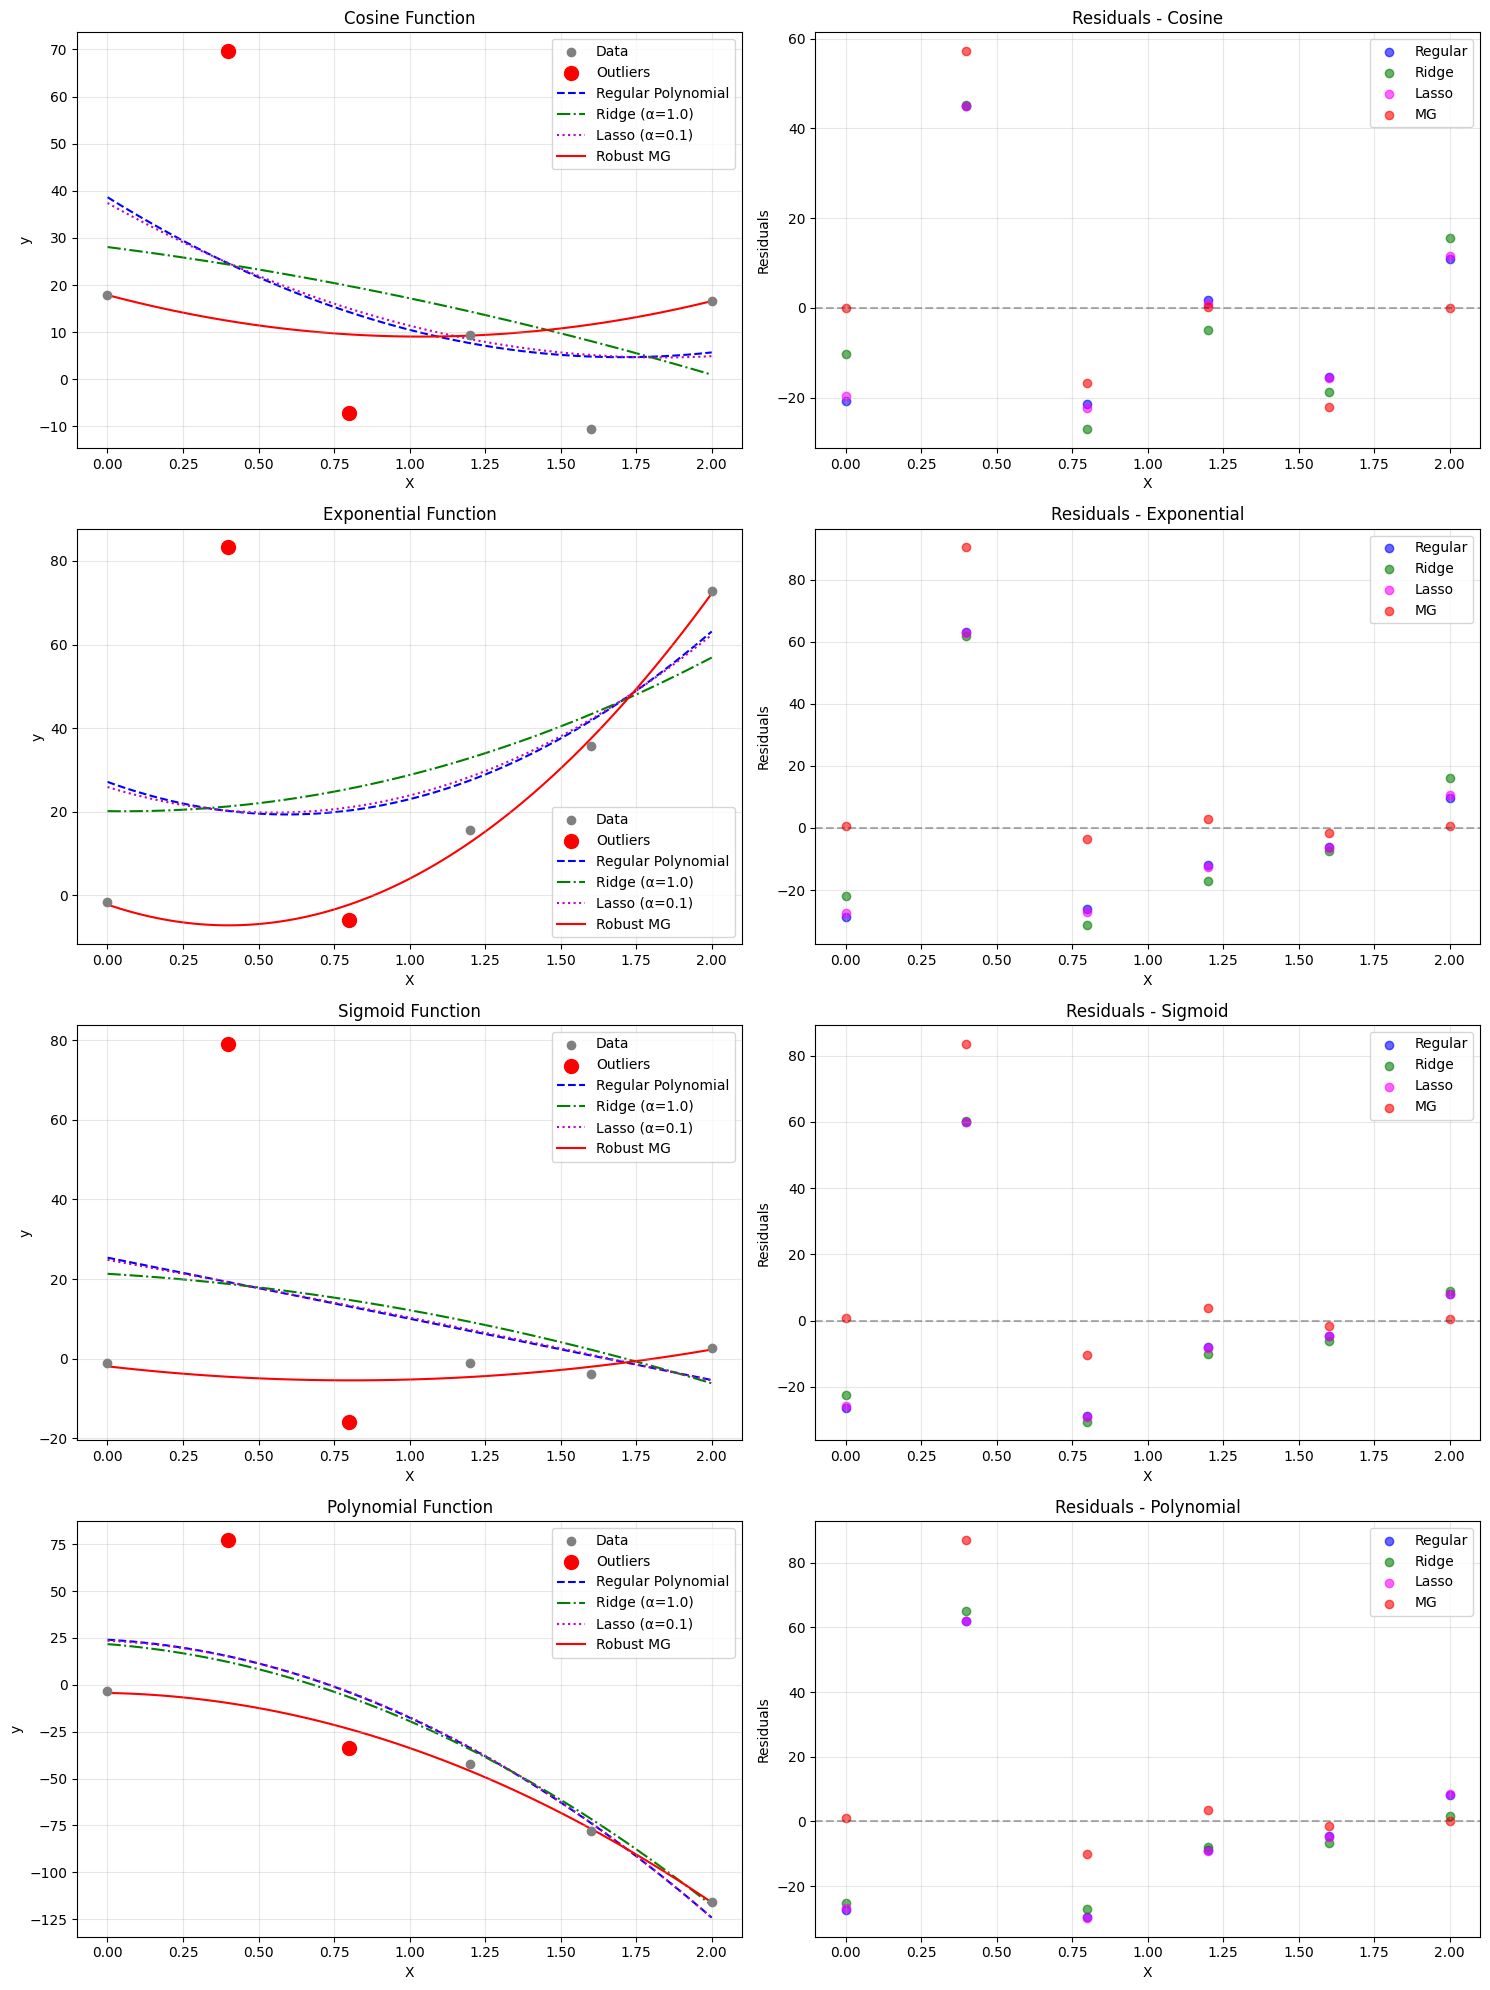

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create multiple test functions
def generate_data(func_type, X, noise_level=1.8, outlier_positions=[1, 2], outlier_values=[80.0, -15.0]):
    if func_type == 'cosine':
        y = 15 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 1.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 0.05 * X.ravel()**3 - 30 * X.ravel()**2 + 1
    
    y = y + np.random.normal(0, noise_level, len(X))
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data - changed to 5 points
    X = np.linspace(0, 2, 6).reshape(-1, 1)  # 5 points total
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 2  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = PolynomialRegressor(degree=degree)
    mg_model.fit(X, y)
    print(f"X: {X.ravel()}")
    print(f"y: {y}")
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.6)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.6)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

Predictions: [17.88529145 12.40489155  9.53557311  9.27733613 11.6301806  16.59410653]
Linear Predictions: [15.88052769 11.28282905  6.6851304   2.08743175 -2.51026689 -7.10796554]
Coefficients: [ 17.88529145 -16.96485157   8.15962955]
Linear Coefficients: [ 15.88052769 -11.49424662]


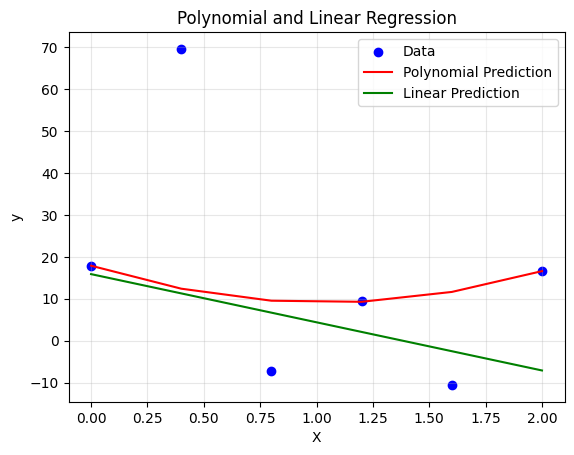

In [ ]:
import numpy as np
from machinegnostics.models.regression import PolynomialRegressor

# Example data
X = np.array([0., 0.4, 0.8, 1.2, 1.6, 2. ])
y = np.array([17.89408548, 69.61586934, -7.19890572, 9.37670866, -10.55673099, 16.57855348])

# Create and fit a robust polynomial regression model
model = PolynomialRegressor(degree=2)
model.fit(X, y)

model_lr = LinearRegressor()
model_lr.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_pred_lr = model_lr.predict(X)

print("Predictions:", y_pred)

# coefficients
print("Coefficients:", model.coefficients)

# x vs y, y_pred plot
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Prediction')
plt.plot(X, y_pred_lr, color='green', label='Linear Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial and Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 375.9472
Ridge Regression:   393.6559
Lasso Regression:   374.0560
Robust MG:          257.4340

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 516.3775
Ridge Regression:   505.5366
Lasso Regression:   508.2516
Robust MG:          5.5653

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 518.3422
Ridge Regression:   489.9117
Lasso Regression:   513.7563
Robust MG:          37.0000

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 550.7217
Ridge Regression:   469.4905
Lasso Regression:   545.9007
Robust MG:          34.5630


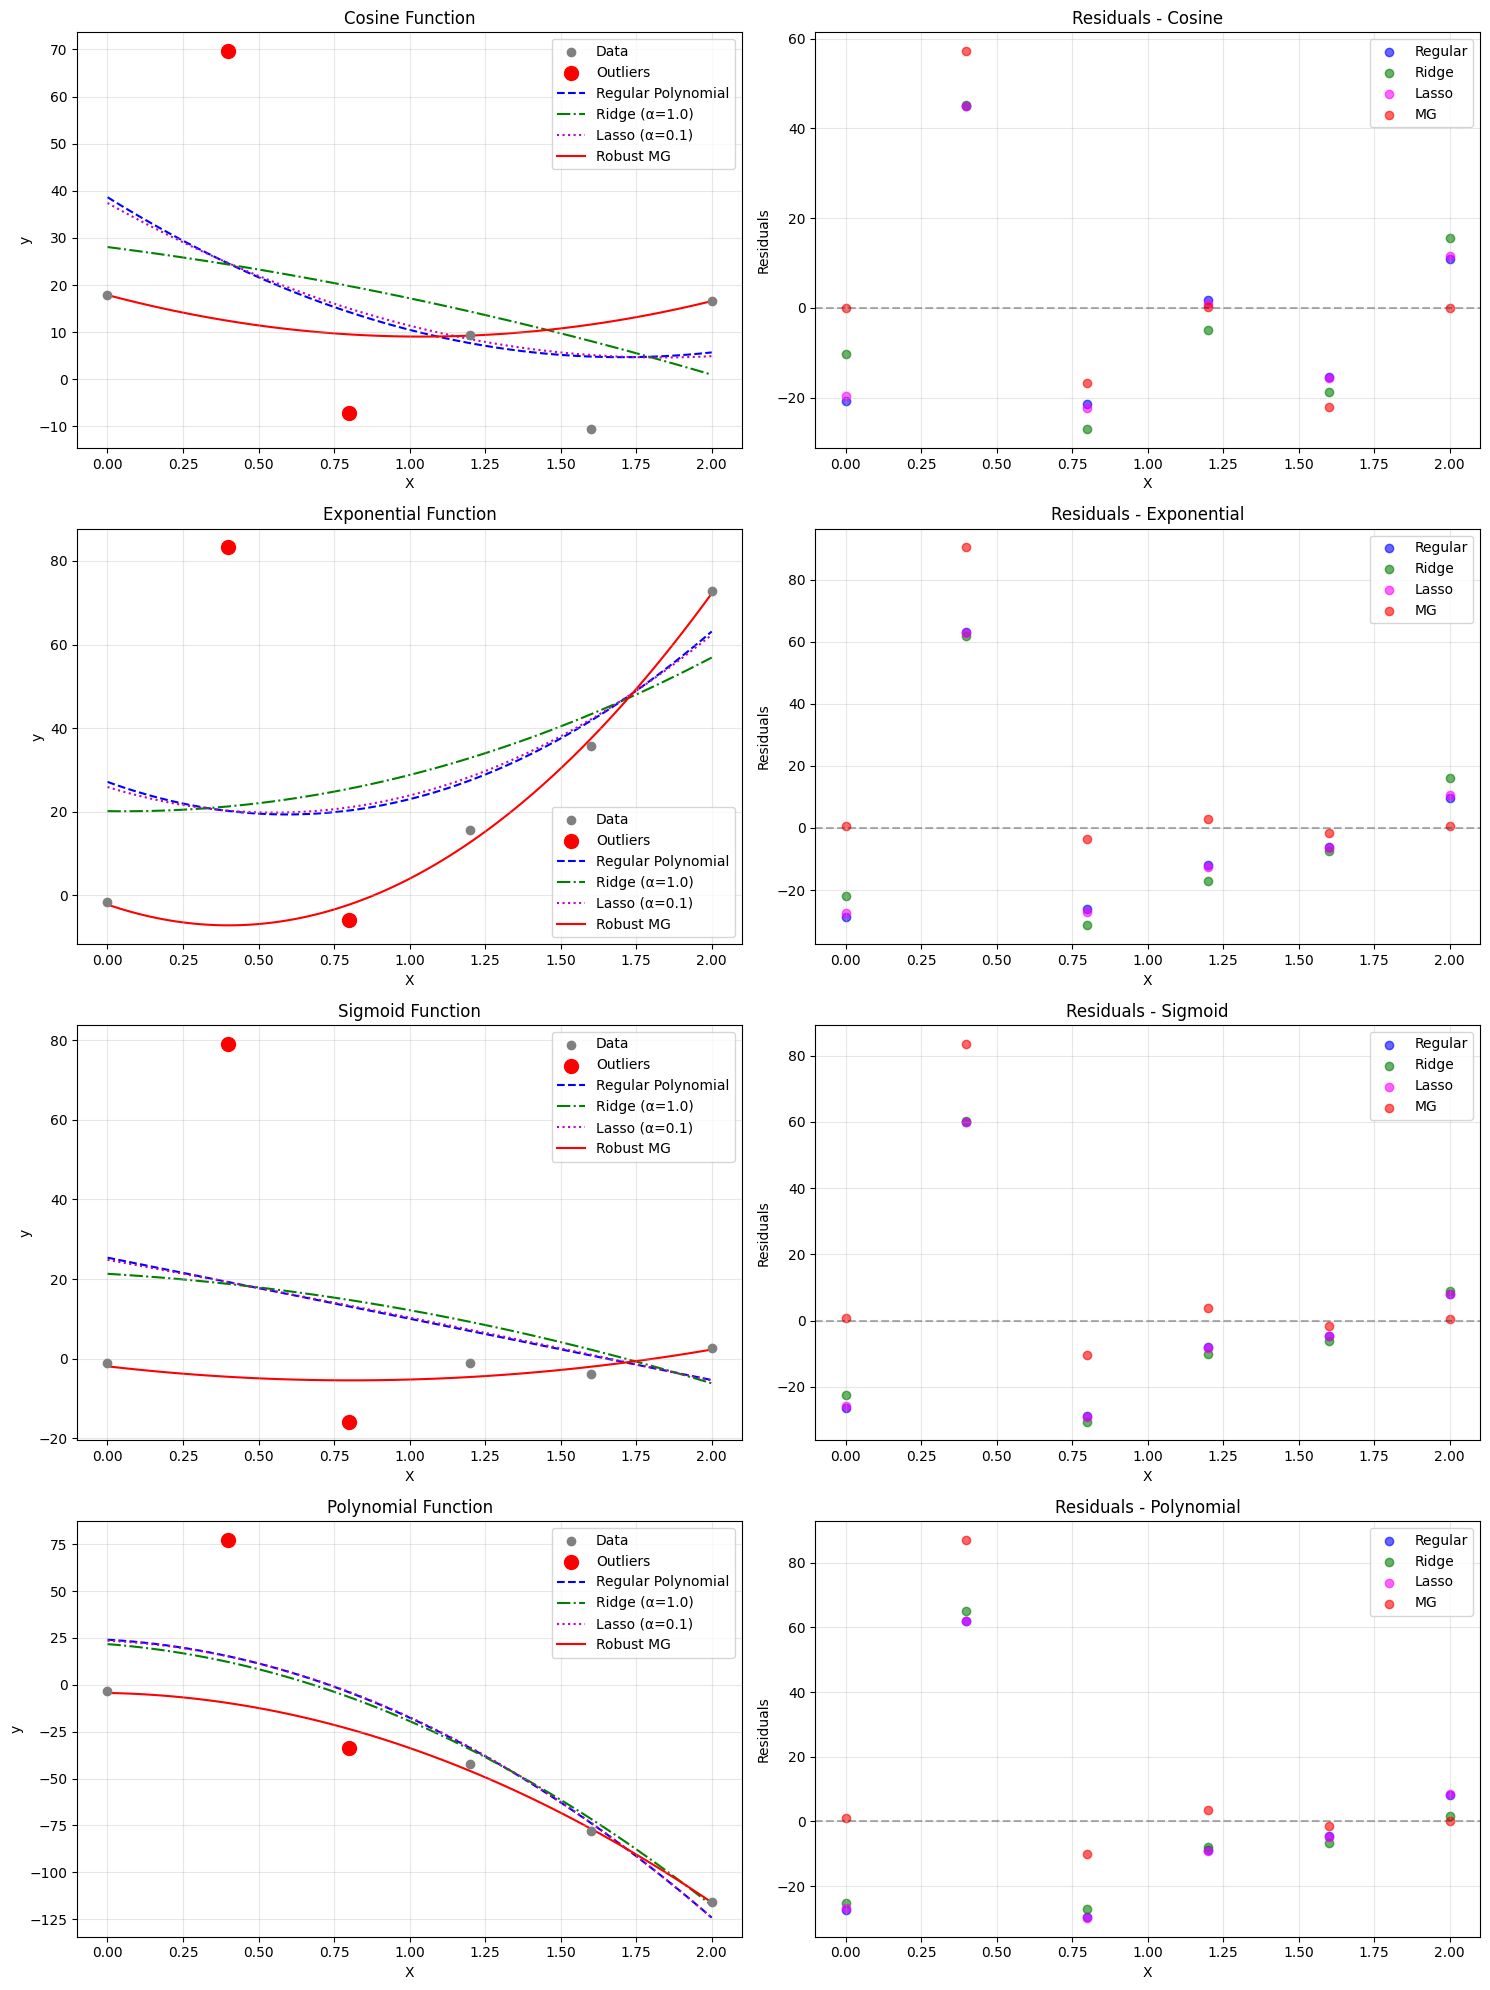

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create multiple test functions
def generate_data(func_type, X, noise_level=1.8, outlier_positions=[1, 2], outlier_values=[80.0, -15.0]):
    if func_type == 'cosine':
        y = 15 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 1.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 0.05 * X.ravel()**3 - 30 * X.ravel()**2 + 1
    
    y = y + np.random.normal(0, noise_level, len(X))
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data - changed to 5 points
    X = np.linspace(0, 2, 6).reshape(-1, 1)  # 5 points total
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Convert to pandas DataFrame/Series
    X_pd = pd.DataFrame(X, columns=['X'])
    X_test_pd = pd.DataFrame(X_test, columns=['X'])
    y_pd = pd.Series(y, name='y')
    
    # Fit models
    degree = 2  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X_pd, y_pd)
    y_pred_regular = poly_reg.predict(X_pd)
    y_pred_regular_test = poly_reg.predict(X_test_pd)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X_pd, y_pd)
    y_pred_ridge = ridge_reg.predict(X_pd)
    y_pred_ridge_test = ridge_reg.predict(X_test_pd)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X_pd, y_pd)
    y_pred_lasso = lasso_reg.predict(X_pd)
    y_pred_lasso_test = lasso_reg.predict(X_test_pd)
    
    # Machine Gnostics regression
    mg_model = PolynomialRegressor(degree=degree)
    mg_model.fit(X_pd, y_pd)
    y_pred_robust = mg_model.predict(X_pd)
    y_pred_robust_test = mg_model.predict(X_test_pd)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.6)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.6)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

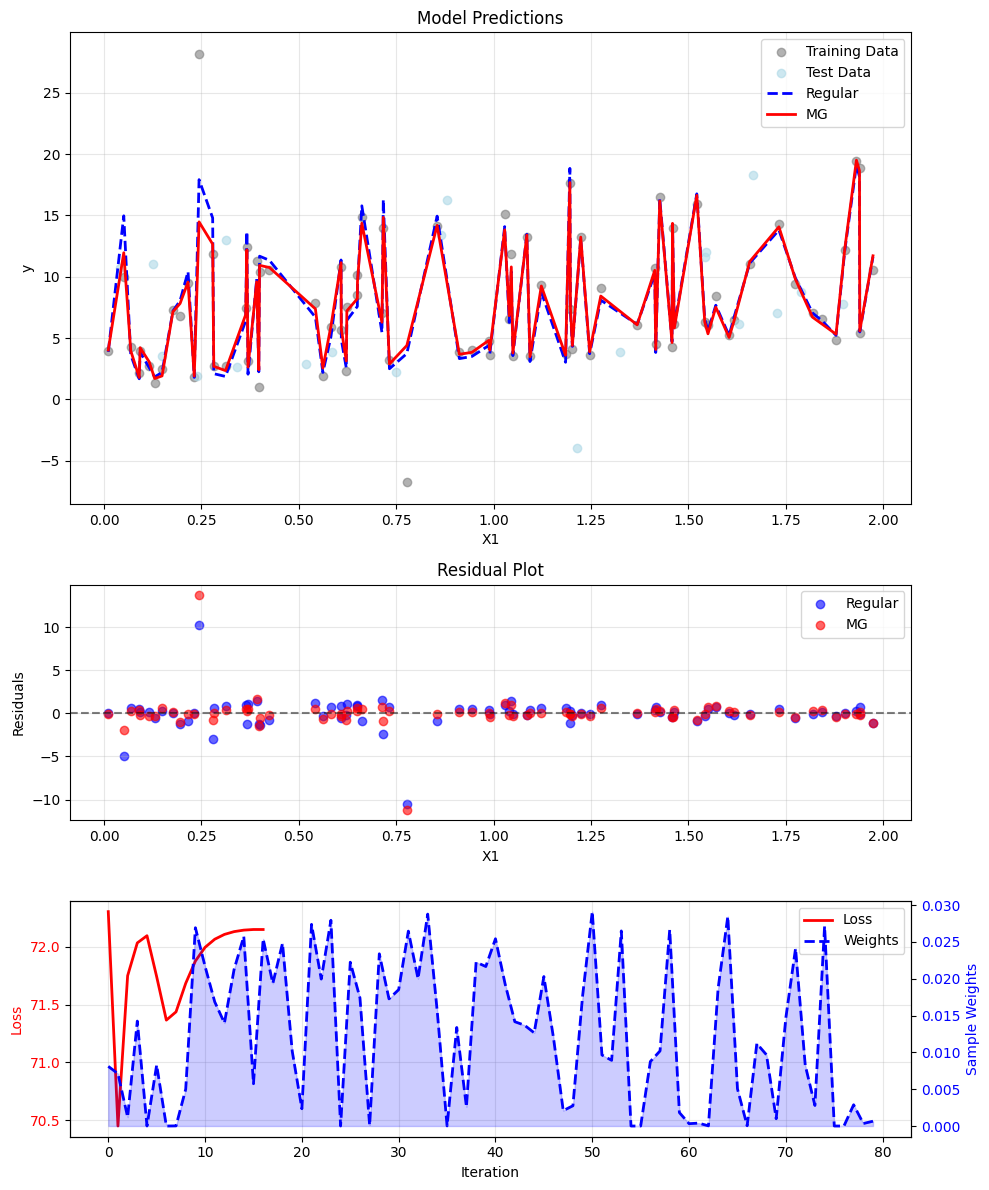


Performance Metrics:
--------------------------------------------------
Training Set:
MSE Regular:    3.6427
MSE MG:         4.2104

Test Set:
MSE Regular:    10.2418
MSE MG:         9.2837


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2D synthetic data
n_samples = 100
X1 = np.random.uniform(0, 2, n_samples)
X2 = np.random.uniform(0, 2, n_samples)
X = np.column_stack((X1, X2))

# True function: f(X1, X2) = 2*X1 + 3*X2^2 + X1*X2 + 1
y_clean = 2*X1 + 3*X2**2 + X1*X2 + 1

# Add noise
noise = np.random.normal(0, 0.5, n_samples)
y = y_clean + noise

# Add outliers
outlier_idx = [10, 30, 40, 60]
y[outlier_idx] += [8.0, -10.0, 15.0, -12.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 3
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree, verbose=True, early_stopping=True, tol=0.0001)
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), height_ratios=[2, 1, 1])

# Plot 1: Regression Plot (using X1 as x-axis)
ax1.scatter(X_train[:, 0], y_train, c='gray', label='Training Data', alpha=0.6)
ax1.scatter(X_test[:, 0], y_test, c='lightblue', label='Test Data', alpha=0.6)
sort_idx = np.argsort(X_train[:, 0])
ax1.plot(X_train[sort_idx, 0], y_pred_regular_train[sort_idx], 'b--', 
         label='Regular', linewidth=2)
ax1.plot(X_train[sort_idx, 0], y_pred_robust_train[sort_idx], 'r-', 
         label='MG', linewidth=2)
ax1.set_xlabel('X1')
ax1.set_ylabel('y')
ax1.set_title('Model Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals_regular = y_train - y_pred_regular_train
residuals_robust = y_train - y_pred_robust_train

ax2.scatter(X_train[:, 0], residuals_regular, c='blue', label='Regular', alpha=0.6)
ax2.scatter(X_train[:, 0], residuals_robust, c='red', label='MG', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X1')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

history = mg_model._history

# Remove entries where values are None (usually the first entry)
history = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history]
h_loss = [h['h_loss'] for h in history]
# Plot 3: Loss History with Sample Weights
ax3.plot(h_loss, 'r-', label='Loss', linewidth=2)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss', color='r')
ax3.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3)

# Add sample weights on secondary y-axis
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(X_train)), mg_model.weights, 'b--', 
              label='Weights', linewidth=2)
ax3_twin.fill_between(range(len(X_train)), mg_model.weights, 
                      alpha=0.2, color='blue')
ax3_twin.set_ylabel('Sample Weights', color='b')
ax3_twin.tick_params(axis='y', labelcolor='b')

# Combine legends for loss plot
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_train - y_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_train - y_train)**2):.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_test - y_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_test - y_test)**2):.4f}")

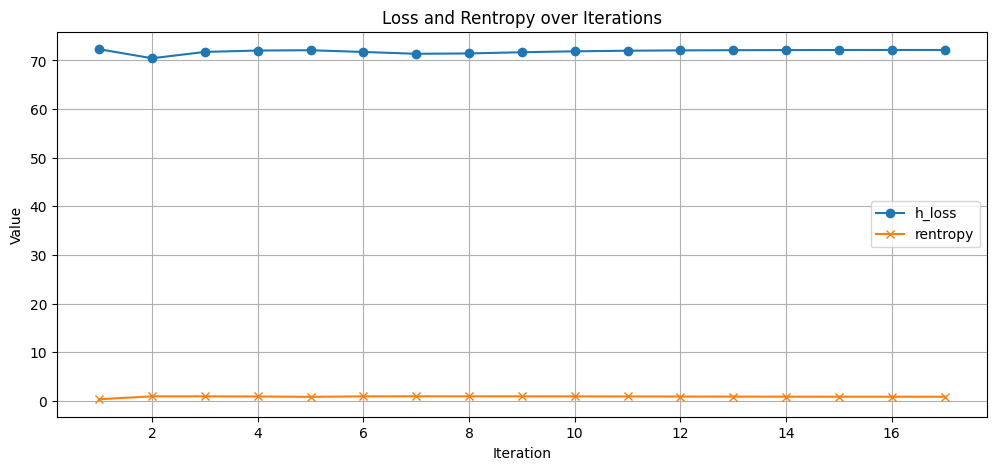

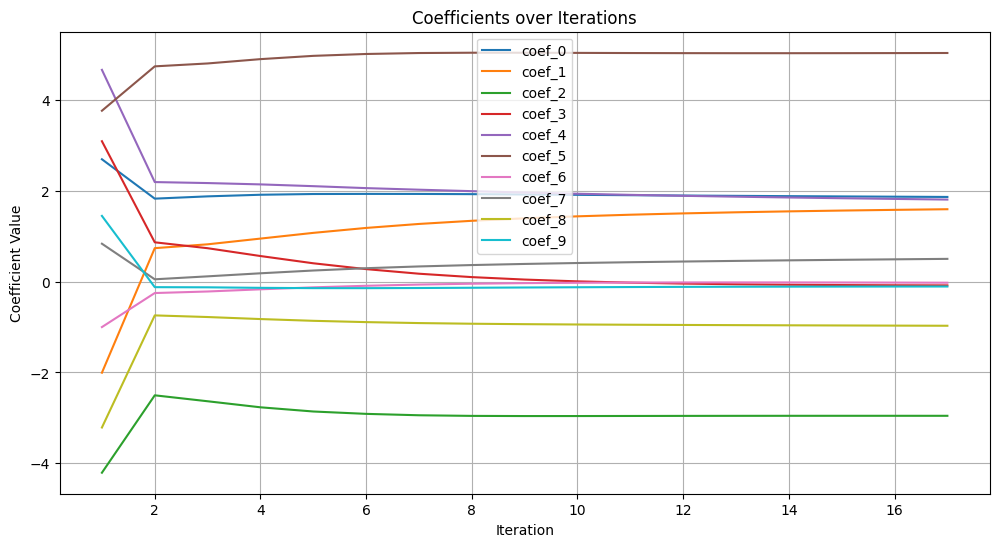

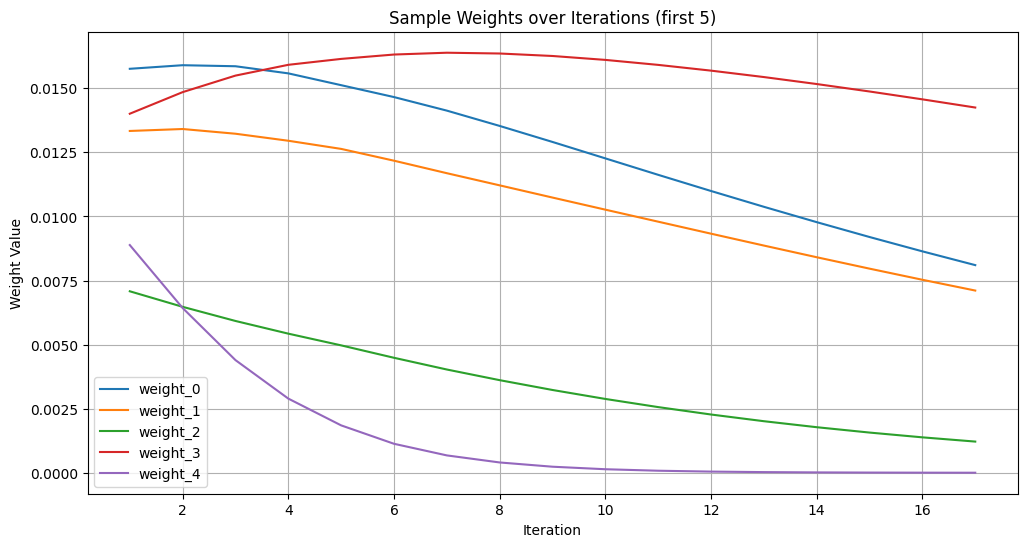

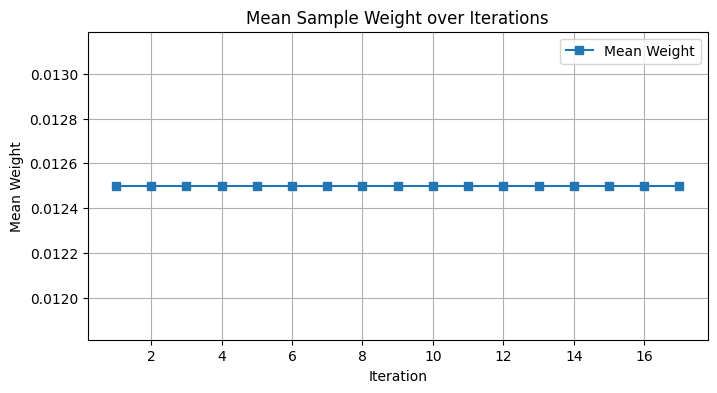

In [14]:
import matplotlib.pyplot as plt
import numpy as np

history = mg_model._history

# Remove entries where values are None (usually the first entry)
history = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history]
h_loss = [h['h_loss'] for h in history]
rentropy = [h['rentropy'] for h in history]

# Plot loss and rentropy
plt.figure(figsize=(12, 5))
plt.plot(iterations, h_loss, label='h_loss', marker='o')
plt.plot(iterations, rentropy, label='rentropy', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Loss and Rentropy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plot coefficients (each as a separate line)
coeffs = np.array([h['coefficients'] for h in history])
plt.figure(figsize=(12, 6))
for i in range(coeffs.shape[1]):
    plt.plot(iterations, coeffs[:, i], label=f'coef_{i}')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.title('Coefficients over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plot weights (as mean weight per iteration, or pick a few indices)
weights = np.array([h['weights'] for h in history])
plt.figure(figsize=(12, 6))
for idx in range(min(5, weights.shape[1])):  # Plot first 5 weights
    plt.plot(iterations, weights[:, idx], label=f'weight_{idx}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Sample Weights over Iterations (first 5)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, plot mean weight per iteration
mean_weights = weights.mean(axis=1)
plt.figure(figsize=(8, 4))
plt.plot(iterations, mean_weights, label='Mean Weight', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Mean Weight')
plt.title('Mean Sample Weight over Iterations')
plt.legend()
plt.grid(True)
plt.show()

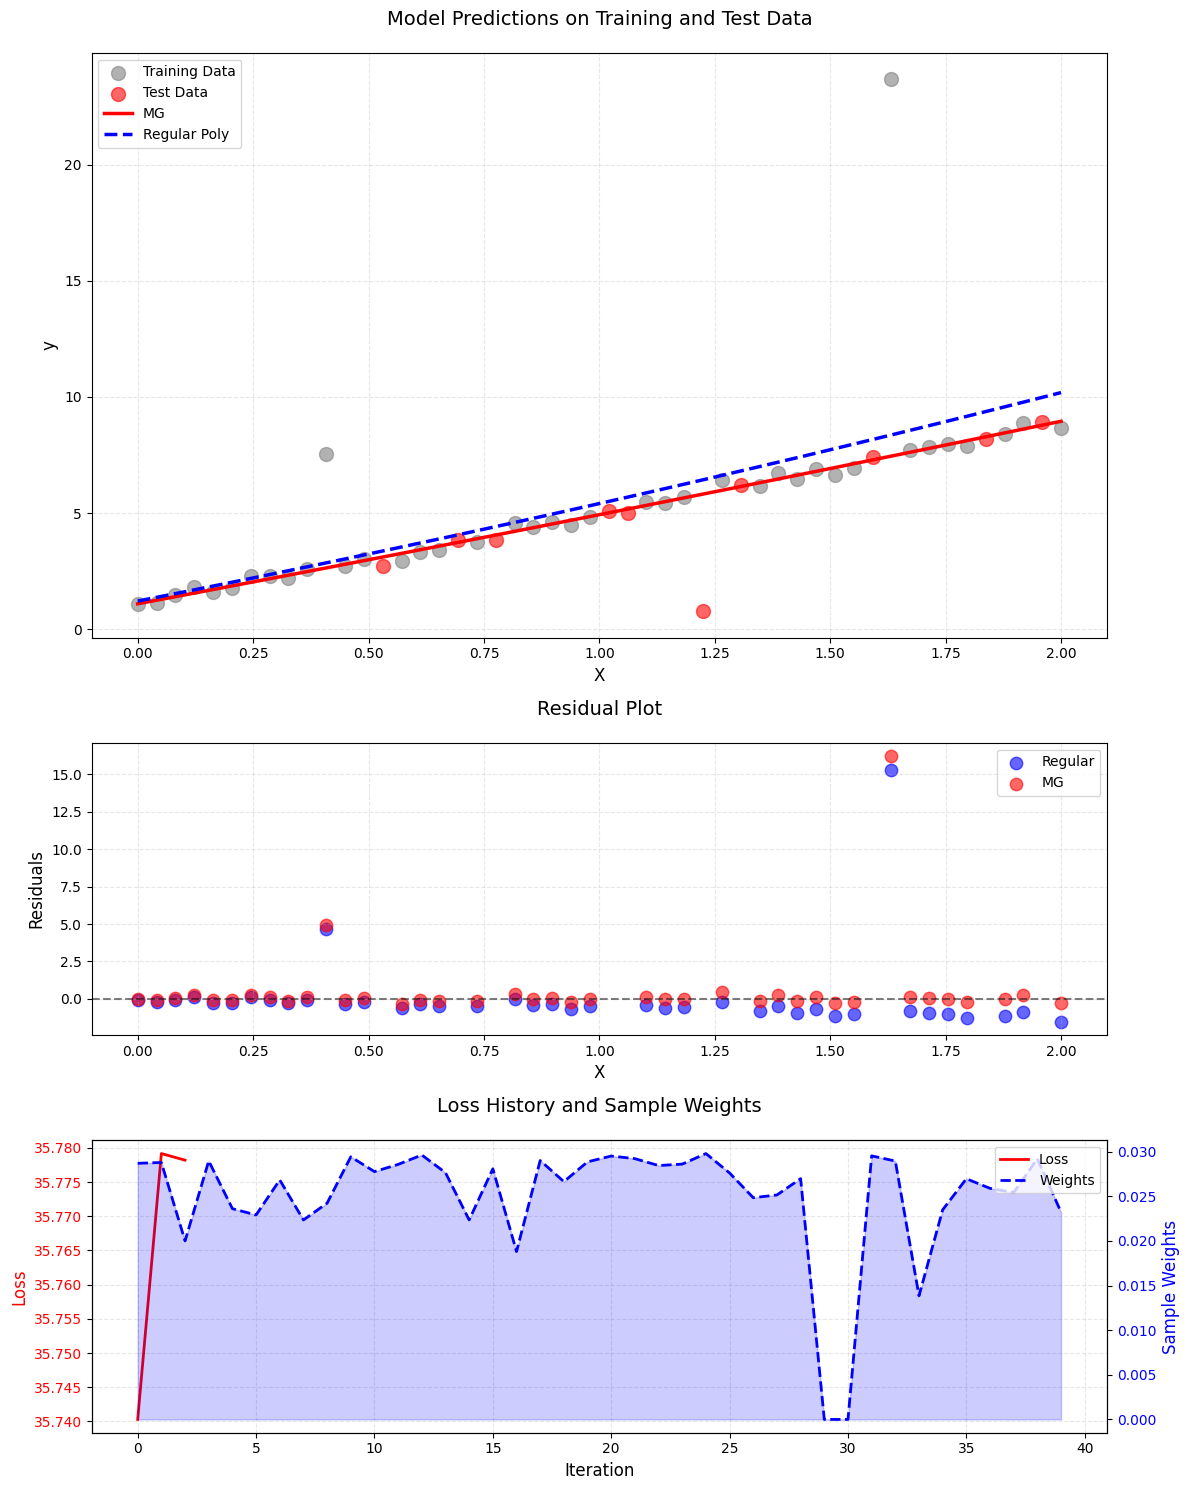


Performance Metrics:
--------------------------------------------------
Training Set:
MSE Regular:    6.8236
MSE MG:         7.2134

Test Set:
MSE Regular:    3.6831
MSE MG:         2.5673

Model Coefficients:
--------------------------------------------------
Regular: [0.         3.91104203 0.28940496]
MG:      [1.09278992 3.74522994 0.09247415]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 2, 50).reshape(-1, 1)  # More points for smoother curves
noise = np.random.normal(0, 0.2, 50)
y = 4 * X.ravel() + 1 + noise  # Linear relationship with noise

# Add some outliers
outlier_idx = [10, 30, 40]
y[outlier_idx] += [5.0, -5.0, 16.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 2
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree, mg_loss='hi')
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# ...existing code...

# Create figure with subplots with adjusted height ratios
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), height_ratios=[2, 1, 1])

# Plot 1: Training and Test Data with Predictions
ax1.scatter(X_train, y_train, c='gray', label='Training Data', alpha=0.6, s=100, zorder=2)
ax1.scatter(X_test, y_test, c='red', label='Test Data', alpha=0.6, s=100, zorder=2)

# Sort X values for smooth curve plotting
X_plot = np.sort(X_train, axis=0)
X_test_plot = np.sort(X_test, axis=0)

# Plot predictions with smoother curves
ax1.plot(X_plot, mg_model.predict(X_plot), 'r-', label='MG', linewidth=2.5, zorder=3)
ax1.plot(X_plot, poly_reg.predict(X_plot), 'b--', label='Regular Poly', linewidth=2.5, zorder=3)

ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Model Predictions on Training and Test Data', fontsize=14, pad=20)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# Plot 2: Residuals with clearer visualization
residuals_regular = y_train - poly_reg.predict(X_train)
residuals_robust = y_train - mg_model.predict(X_train)

ax2.scatter(X_train, residuals_regular, c='blue', label='Regular', alpha=0.6, s=80)
ax2.scatter(X_train, residuals_robust, c='red', label='MG', alpha=0.6, s=80)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, pad=20)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')

history = mg_model._history

# Remove entries where values are None (usually the first entry)
history = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history]
h_loss = [h['h_loss'] for h in history]

# Plot 3: Loss History with clearer weight visualization
ax3.plot(h_loss, 'r-', label='Loss', linewidth=2)
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12, color='r')
ax3.set_title('Loss History and Sample Weights', fontsize=14, pad=20)
ax3.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3, linestyle='--')

# Add sample weights on secondary y-axis with better formatting
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(X_train)), mg_model.weights, 'b--', label='Weights', linewidth=2)
ax3_twin.fill_between(range(len(X_train)), mg_model.weights, alpha=0.2, color='blue')
ax3_twin.set_ylabel('Sample Weights', fontsize=12, color='b')
ax3_twin.tick_params(axis='y', labelcolor='b')

# Add combined legend for loss and weights
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3_twin.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# ...existing code...

# Calculate training set metrics
mse_regular_train = np.mean((y_pred_regular_train - y_train)**2)
mse_robust_train = np.mean((y_pred_robust_train - y_train)**2)

# Calculate test set metrics
mse_regular_test = np.mean((y_pred_regular_test - y_test)**2)
mse_robust_test = np.mean((y_pred_robust_test - y_test)**2)

# Print metrics with better formatting
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {mse_regular_train:.4f}")
print(f"{'MSE MG:':<15} {mse_robust_train:.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {mse_regular_test:.4f}")
print(f"{'MSE MG:':<15} {mse_robust_test:.4f}")

print("\nModel Coefficients:")
print("-" * 50)
print(f"Regular: {poly_reg.named_steps['linearregression'].coef_}")
print(f"MG:      {mg_model.coefficients}")


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 445.5874
Robust MG Regression: 548.8367

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 523.2084
Robust MG Regression: 751.0074

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 522.8897
Robust MG Regression: 804.6033

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 503.3894
Robust MG Regression: 784.5227


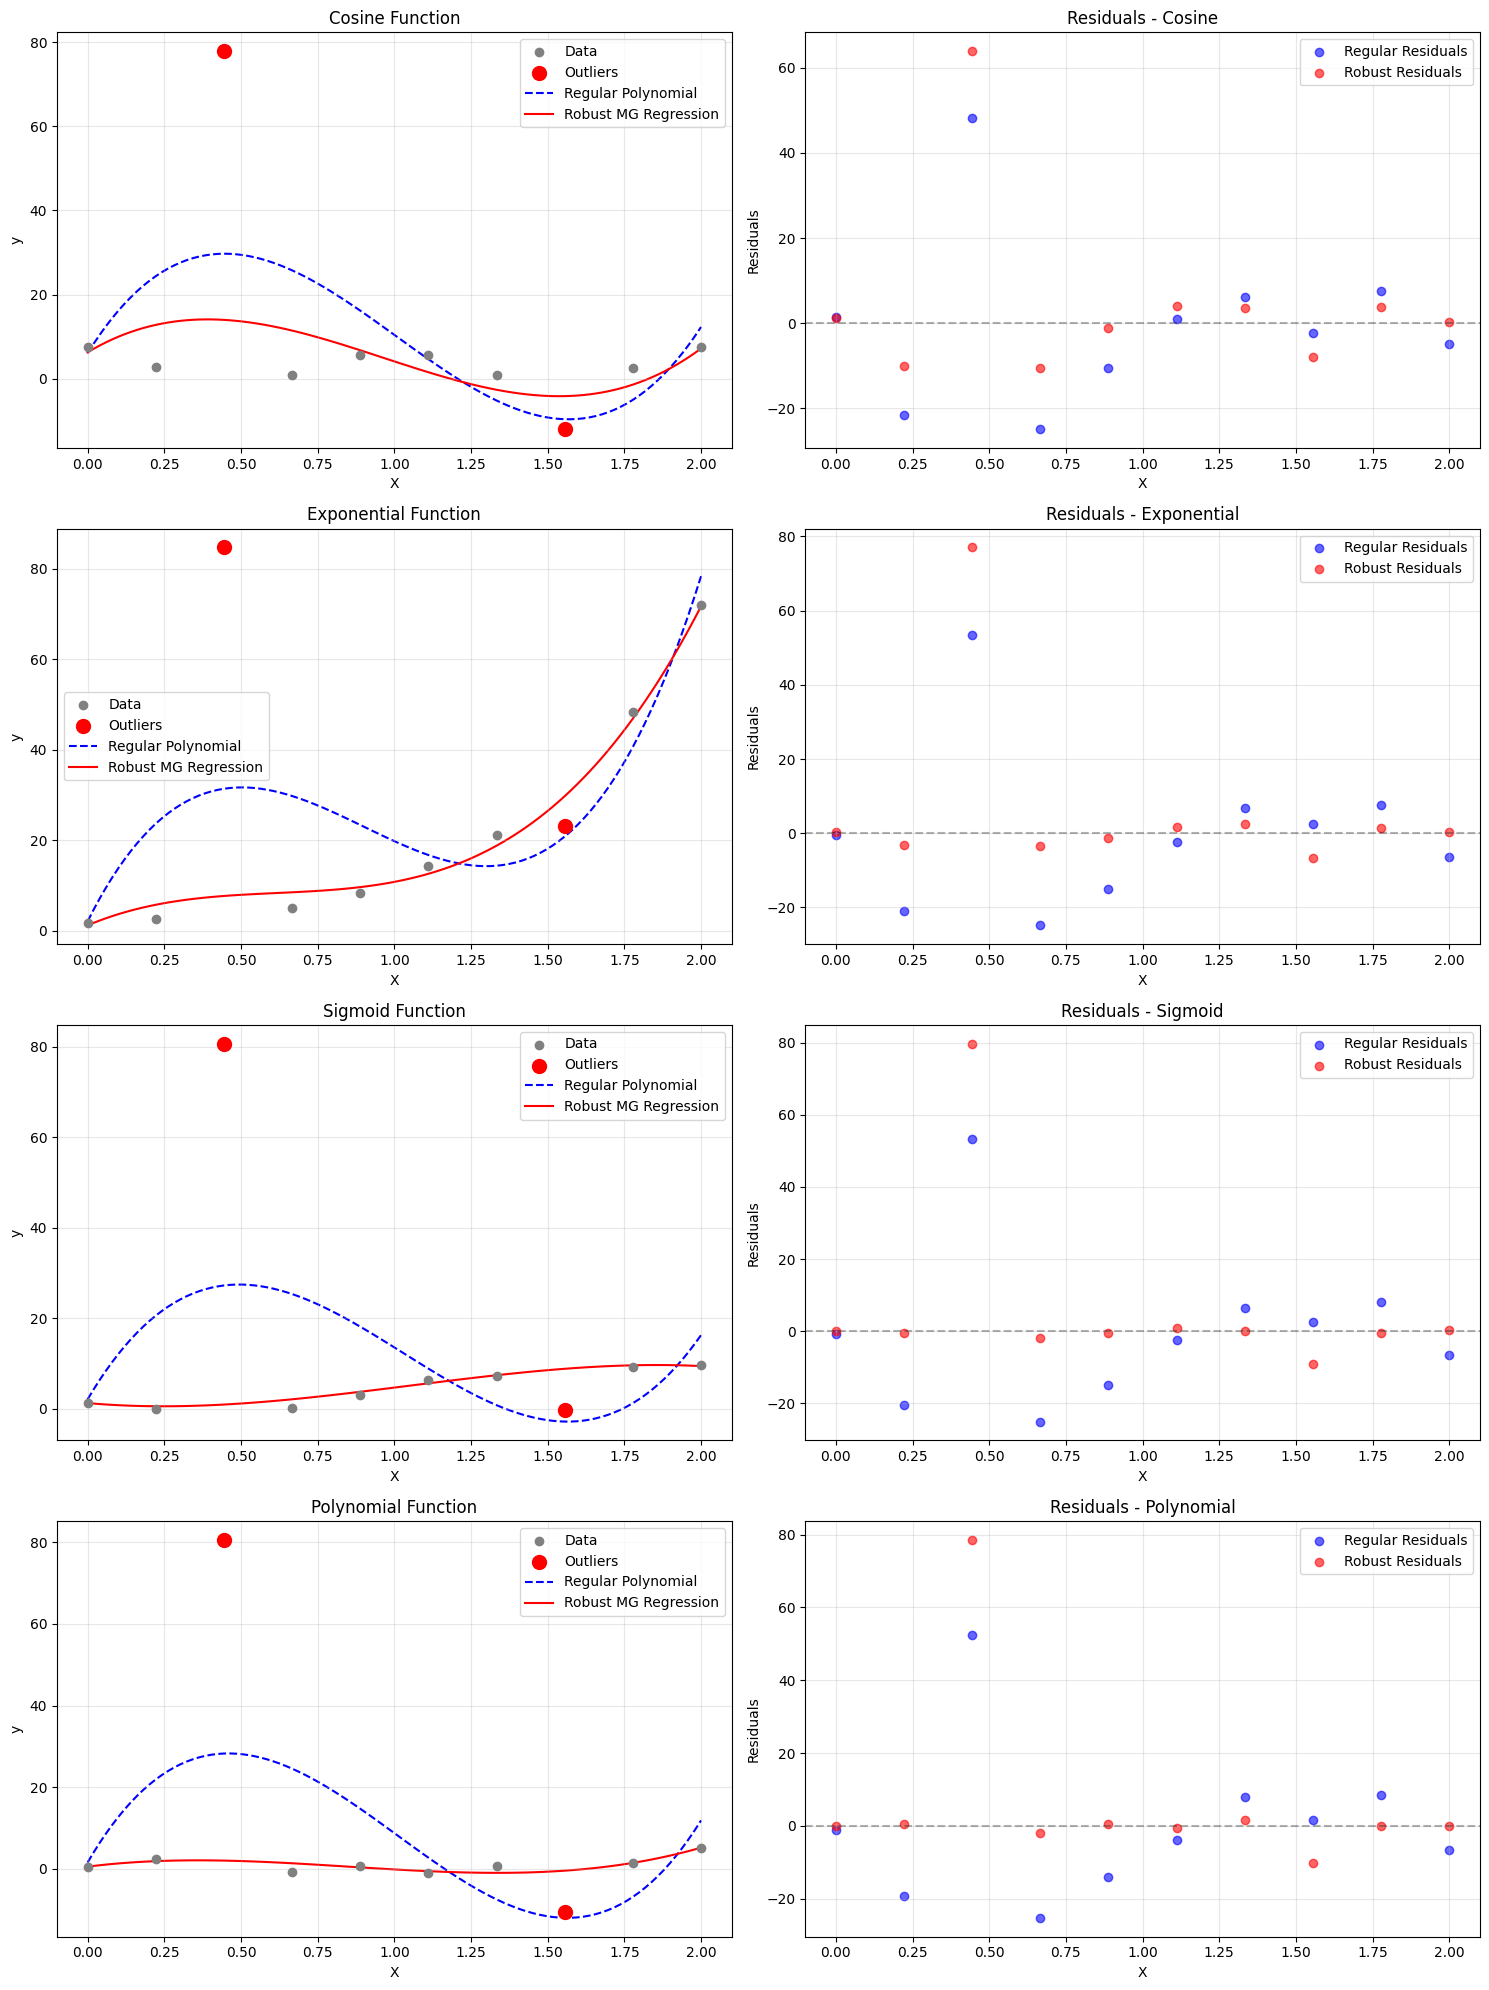

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)
outlier_positions=[2, 7]

# Create multiple test functions
def generate_data(func_type, X, noise_level=0.9, outlier_positions=outlier_positions, outlier_values=[80.0, -10.0]):
    if func_type == 'cosine':
        y = 5 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 10.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 2 * X.ravel()**3 - 3 * X.ravel()**2 + 1
    
    # Add noise
    y = y + np.random.normal(0, noise_level, len(X))
    
    # Add outliers
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 10).reshape(-1, 1)
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 3  # Increased degree for more complex functions
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    mg_model = PolynomialRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[outlier_positions], y[outlier_positions], color='red', s=100, label='Outliers', zorder=3)
    # axes[i,0].scatter(X[8:], y[2,8], color='red', s=100, label='Outliers', zorder=3)
    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Print metrics
    mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
    mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Robust MG Regression: {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [17]:
from machinegnostics.metrics import robr2, gmmfe, divI, evalMet, hc

In [18]:
# Example data
y = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_fit = np.array([0.9, 2.1, 2.9, 4.2, 4.8])
weights = np.array([1, 1, 1, 1, 1])

# Calculate the robust R-squared value
robust_r2 = robr2(y, y_fit, weights)
print(f"Robust R-squared: {robust_r2:.4f}")

# Calculate the GMMFE
gmmfe_value = gmmfe(y, y_fit)
print(f"GMMFE: {gmmfe_value:.4f}")

# Calculate the divergence
divergence_value = divI(y, y_fit)
print(f"Divergence: {divergence_value:.4f}")

# Calculate the evaluation metrics
metrics = evalMet(y, y_fit, weights)
print(f"Evaluation Metrics: {metrics}")

# hc
hc_value = hc(y, y_fit)
print(f"hc: {hc_value:.4f}")

Robust R-squared: 0.9892
GMMFE: 1.0571
Divergence: 1.0509
Evaluation Metrics: 0.8904755411002715
hc: 0.0147


In [19]:
# from machinegnostics.magcal import gcorrelation, gvariance, gmodulus, gautocovariance, gcovariance, gmedian

In [20]:
# # example of gautocovariance
# data = np.array([1, 2, 3, 4, 5])
# gautocov_i = gautocovariance(data, 'i')
# gautocov_j = gautocovariance(data, 'j')
# print(f'Gautocovariance i:{gautocov_i}, Gautocovariance j:{gautocov_j}')
# # example of gcovariance
# data1 = np.array([1, 2, 3, 4, 5])
# data2 = np.array([5, 4, 3, 2, 1])
# gcov_i = gcovariance(data1, data2, 'i')
# gcov_j = gcovariance(data1, data2, 'j')
# print(f'Gcovariance i:{gcov_i}, Gcovariance j:{gcov_j}')
# # example of gmodulus
# data = np.array([1, 2, 3, 4, 5])
# gmod_i = gmodulus(data, 'i')
# gmod_j = gmodulus(data, 'j')
# print(f'Gmodulus i:{gmod_i}, Gmodulus j:{gmod_j}')
# # example of gmedian
# data = np.array([1, 2, 3, 4, 5])
# gmed_i = gmedian(data, 'i')
# gmed_j = gmedian(data, 'j')
# print(f'Gmedian i:{gmed_i}, Gmedian j:{gmed_j}')
# # example of gcorrelation
# data1 = np.array([1, 2, 3, 4, 5])
# data2 = np.array([5, 4, 3, 2, 1])
# gcor_i = gcorrelation(data1, data2, 'i')
# gcor_j = gcorrelation(data1, data2, 'j')
# print(f'Gcorrelation i:{gcor_i}, Gcorrelation j:{gcor_j}')
# # example of gvariance
# data = np.array([1, 2, 3, 4, 5])
# gvar_i = gvariance(data, 'i')
# gvar_j = gvariance(data, 'j')
# print(f'Gvariance i:{gvar_i}, Gvariance j:{gvar_j}')